# Introduction to Convolutional Neural Networks

Convolutional neural networks (CNNs) are a special architecture of neural network that is meant to be used when the features have some local correlation. The most obvious example is for natural images; a pixel's neighbours are highly correlated with it, and can provide extra information about how to classify that pixel. Another example is for natural language processing. In this case, the words surrounding a word of interest offer extra contextual information about how to interpret that word. A similar thing happens with time series, or signal analysis.

To accomplish this a convolutional neural networks uses a mathematical operation called a convolution. This basically amounts to taking sliding one function or matrix across another and doing elementwise multiplication and then accumulation. I actually really recommend looking at the Wikipedia page on [convolution](https://en.wikipedia.org/wiki/Convolution) (specially the gifs!). Crucially the matrix we'll be "sliding" will be the feature that we are looking for in the image.

Convolutional neural networks are not just about convolutions, they also use _pooling_ operations to summarize data from one layer to another and reduce the dimensionality. They also make use of multi-layer perceptrons near the end of the network to accurately classify inputs.

It should be mentioned that CNNs were heavily inspired by how the mammalian visual system is layed out and works. It is for this reason that you will sometimes see a lot of biologically inspired language around the topic.

## Convolution

Again, I really recommend taking a look at the Wikipedia page for this to get a visual idea for how this operation works.

Let's take the example of an image being analyzed by our neural network. Our network's job is to learn what features are important to use in a classification scenario. For example in the first layer of the CNN it is usually useful to learn features for basic contours (straight lines, end stops, right hand curves, etc). We sometimes call these features kernels, especially in the context of the convolution operation for historical reasons.

![](fig91.png)

The output of our convolution operation will be to the element-wise multiplication of our kernel with the image, and then accumulate all those values. Take a look at the image above.

## Local Connections & Weight Sharing

Now we need to figure out how to compute a convolution using a neural network. The key aspect here is that we will not want neurons to make connections to every neuron in the next layer. Instead we will want the neurons to form _local connections_. That is, the neuron will only make connections to the nearest k neighbours in the previous layer. This is represented by the top diagram in the image below. Contrast it to the fully connected layers in the bottom diagram.

![](fig92.png)

For the locally connect layers, the input $x_3$ only influences neurons $s_2, s_3$ and $s_4$. Or conversely the output neuron $s_3$ only takes inputs from $x_2, x_3$ and $x_4$. Perhaps it is easier to see why this is so important by looking at which neurons don't make connections. In the locally connected layers, ouput neuron $s_5$ does not receive any information from input neuron $x_3$. That is $s_5$ does not know, or care, about the value of $x_3$.

Using these local connections means that we can drastically reduce the number of weights connecting one layer to another, which makes our network more efficient. This mimics a real biological fact in the early visual system called a neuron's _receptive field_, ie the area of the visual field that the neuron is actually paying attention to. In any case, the reason why we can drastically cut so many weights from our network is because we believe that the features we're ignoring are not important for the accuracy of our network. The neuron processing the bottom left corner of an image probably doesn't care about the value of the top right corner of the same image. At least not in the early stages.

The next step to be able to implement convolutions in our neural networks is to make sure we can "slide" our kernel across the entire image. Remember that in this case the kernel is a matrix (for 2D images) or a vector (for 1D data like time-series). So if we force each output neuron to make local connections with the input, we can get our matrix/vector. By forcing each output neuron to use the exact same weights as their neighbouts then we guarantee that they all use the same kernel.

![](fig95.png)

We call this _weight sharing_. The top diagram in the image above has bolded some of the weights that are shared. You can see that each of the output neurons applies the same weight to the input neuron right across from itself. In contrast, a fully connected network will not share weights.

This again allows us to drastically reduce the number of weights we need to keep track of. In fact CNNs are much more efficient for data that has the local correlation we've been talking about since they have much fewer parameters to train.

By making use of these local connections and weight sharing we can now implement convolutions in out neural networks. The local connections allow us to formulate our kernel shape, and the weight sharing guarantees that we "slide" the same kernel across the entire image.

## Feature Maps

A feature map is the result of our convolutional layer. If we are dealing with images, then the feature map for a particular kernel can be interpreted as an image showing where those features are the most prominent.

For example, a kernel that selects for veritcal lines will produce a feature map that will only highlight the vertical features in our image. Whereas a feature map that is generated from a kernel that is selective for right leaning curves will highlight those features in our image.

![](featureMaps.png)

This does imply that we want to have more than one kernel in each convolutinoal layer. In the first layer of our CNNS we might have a need to know about horizontal lines, vertical lines, left curves, right curves, different line stops, etc. We will not be telling the network what to learn, but we do know that it will need to learn more than one feature!

## Pooling

The last thing we need for a moden convolutinal network is some form of _pooling_. Pooling is any local statistical summary we can make of our feature maps. For example, we might choose to only take the average of a 2x2 grid into our next layer. This is called average pooling. By far the most common kind of pooling is Max Pooling, where we will take the maximum value from the window in question. Pooling give our network a really nice property: it makes our network _invariant to small shifts_ in the input.

![](fig98.png)

Since we are making a local summary of the neuron activations at that layer, if we shift the image (or the values of our neurons) one pixel over to the right, most of the outputs from the pooling layer will not change by much (if at all, as is sometimes the case for max pooling). This means that our network does not care if the input is shifted over. Pooling layers also reduce the size of our feature maps, since we are applying some kind of statistical summary, the size of our feature maps tends to at minimum halve in each dimension. This again gives us great gains in computational complexity, since we will have to calculate fewer parameters for subsequent layers. Pooling is also an operation that was inspired by real neuroscience!

## Last Considerations

You might be concerned that if only allow local connections that we might need to have pretty large kernels, but in reality most models use kernels that are around 5x5 pixels, often 3x3 sometimes as high as 13x13 (very rare). The reason why we can get away with such small kernels is two-fold: stacking convolutional layers, and also the pooling operation make the receptive fields of neurons in later layers larger (see image below).

![](fig94.png)

So by weaving convolutions and pooling, we can make sure our later layer neurons have a pretty good idea of what features were represented where in the image.

We also need to talk about how all these opereations are performed in the context of neural networks. The image below has a schematic.

![](fig97.png)

We first convolve with as many filters as we have, then apply our non-linearity and finally do some pooling operation. This is not strictly necessary. In fact, there's been some strong papers showing that pooling might not always be necessary. However, the non-linearity must always be present!

Finally, at some point you will have to classify the input image. Usually this means that we will need a vector output (a vector with as many elements as there are classes in your problem set). Traditionally, we think of the CNN as being a feature extractor that we will connect to an MLP. That is it will find good features that will be meaningful for our multilayer perceptron. Usually this means that when we are done with our convolutions we will flatten the features maps into a vector and start using fully connected dense layers until we get to out output.

# Using Keras for CNNs

Thankfully Keras already has all the necessary layers to be able to do convolutions. We'll be focusing on images almost exclusively from now on, so we'll deal with 2 dimensional convolutions.

To make a 2D convolutional layer, we just need to import it, then when adding it to the model set the number of kernels, the size of the kernels, and what non-linearity we want to follow it.

We can also import different pooling layers. We will use max pooling for now. When you add it to the model, you specify what size of a window you want to pool over. The default value will reduce the dimensionality of your images by 2 in width and height.

As always, you have to remember to give the first layer of your model the input shape of your data, however for images you have to be a little bit careful. There are two different valid image shapes in the wild: (# of Channels, Height, Width) or (Height, Width , # of channels). The number of channels refers to how many color channels you have in your image. Generally you'll have a red, a green and a blue channel. Sometimes it will be better to use a single grayscale channel. In some specialized situations you might have access to light outside the visible spectrum, or to depth information. In any case, you need to let the Conv2D layers know what is the shape of your data. I recommend massaging your data so that the channels are last, as this will be the default in Keras. In any case it is a parameter that you can set.

I strongly encourage you to read the [convolution](https://keras.io/layers/convolutional/) and [pooling](https://keras.io/layers/pooling/) documentation on the Keras website. Especially the Conv2D and MaxPooling2D layers.

After you are done with your convolutions you can use the Flatten layer to turn your feature maps into a vector and start adding Dense layers into your network until you reach your output layer.

# Exercise

The exercise for this session will be more involved on the programming side of things than in previous ones. You need to start becoming familiar with Keras and all the errors that will invariably (don't worry we all crash stuff all the time!).

For this exercise your job will be to construct a model that will classify the digits of the MNIST dataset. The dataset can be downloaded from keras by going to their datasets module and importing it (this will be done for you). 

For this task you will not be classifying only two classes but ten (one for each digit). For this reason, your final layer should have 10 output neurons. To make the task simpler, you should use a softmax activation in the last layer, and train using categorical cross entropy as your loss function. Feel free to pick whatever optimizer you want.

You will train your model on the training set and then test it with the test set. Do not be discouraged if Keras says that each epoch will take on the order of three to five minutes to train, this is normal. You should expect results above 95% by the end of the second epoch if not the third. There are many trick you can use to reduce training time at the cost of accuracy, feel free to explore.

As a bonus, plot some of the kernels from the first layer of your CNN, and some of the associated feature maps, see if you can figure out what that kernel is selecting for.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras import utils

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
# Make y_train and y_test into one hot encoded vectors
if y_train.shape != (6000,10) :
    y_train = utils.to_categorical(y_train, num_classes=10)
    
if y_test.shape != (1000,10) :
    y_test = utils.to_categorical(y_test, num_classes=10)

Notice that you will need to turn the labels (y) into a one hot encoded vector. Keras has a function in the utils module to do this. You can (and should) plot some the images from the training set, so you can see what you are dealing with.

In [6]:
# Plot some numbers

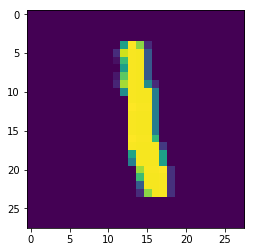

In [7]:
plt.imshow(x_train[6])

It will also be really useful to normalize your data. Since these are grayscale images, we know the max is 255 and the min is 0, so dividing the images by 255 will guarantee that all the pixels are between 0 and 1.

In [8]:
# Normalize your training set (and the testing set!!!!)

In [9]:

x_train = x_train/255

x_test = x_test/255

#min = 0, max = 255

In [10]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

Now you should build and test your model. You can use model.summary() after you have built your model to get a nice summary of what are the output shapes of each layer and how many parameters you have to train. A really common error at this stage is to do too many convolutional-pooling layers such that you try to shrink your input's size too small.

In [180]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [181]:
model = Sequential()

#first layer (convolution)
model.add(Conv2D(16,kernel_size=(3,3),data_format="channels_last",activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.2))
#first layer (pooling)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

In [182]:
#second layer (convolution)
model.add(Conv2D(32,kernel_size=(3,3),data_format="channels_last",activation='relu'))
model.add(Dropout(0.2))
#second layer (pooling)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

In [183]:
model.add(Flatten())

In [184]:
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [185]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [186]:
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=30, batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 54s 897us/step - loss: 0.8663 - acc: 0.6992 - val_loss: 0.1596 - val_acc: 0.9634
Epoch 2/30
60000/60000 [==============================] - 52s 866us/step - loss: 0.3061 - acc: 0.9108 - val_loss: 0.0992 - val_acc: 0.9751
Epoch 3/30
60000/60000 [==============================] - 52s 871us/step - loss: 0.2267 - acc: 0.9370 - val_loss: 0.0750 - val_acc: 0.9813
Epoch 4/30
60000/60000 [==============================] - 51s 857us/step - loss: 0.1912 - acc: 0.9477 - val_loss: 0.0677 - val_acc: 0.9825
Epoch 5/30
60000/60000 [==============================] - 52s 871us/step - loss: 0.1689 - acc: 0.9548 - val_loss: 0.0585 - val_acc: 0.9858
Epoch 6/30
60000/60000 [==============================] - 52s 866us/step - loss: 0.1515 - acc: 0.9604 - val_loss: 0.0471 - val_acc: 0.9869
Epoch 7/30
60000/60000 [==============================] - 52s 868us/step - loss: 0.1442 - acc: 0.9624 - val_loss: 0.

KeyboardInterrupt: 

Number = 5
index =  6067


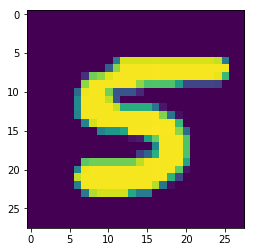

In [187]:
x=np.random.randint(0,9999)
p = model.predict(x_test[np.newaxis,x,:,:,:])
plt.imshow(x_test[x,:,:,0])
#y_test[100]
print("Number =",np.argmax(p))
print("index = ",x)
#p[0,np.argmax(p)]

In [188]:
np.random.randint(0,59999)

52915

In [188]:
print(np.argmax(p))
p[0,np.argmax(p)]

6


0.9986254

In [182]:
p

array([[1.2311259e-04, 3.8025062e-06, 4.7658174e-05, 7.9893897e-07,
        1.0370639e-04, 1.2467266e-04, 9.9862540e-01, 1.0208732e-07,
        9.7035698e-04, 3.9904094e-07]], dtype=float32)

In [190]:
model.save("15Epocs_dropout_adam.h5")